In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df
from dogo.wasserstein.wasserstein_distance import experiment_combination_distances

In [3]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [4]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
    ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("D4RL-HC-M_10000", "D4RL Medium"),
    ("D4RL-HC-ME_10000", "D4RL Medium-Expert"),
    ("D4RL-HC-MR_10000", "D4RL Medium-Replay"),
    ("D4RL-HC-R_10000", "D4RL Random"),
    ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
    ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("SAC-RT-2M-4-P0_10000", "Softlearning 1 - 2M Steps"),
    ("SAC-RT-3M-4-P0_10000", "Softlearning 1 - 3M Steps"),
    ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("RAND-1", "Random Policy 1"),
    ("RAND-2", "Random Policy 2"),
    ("RAND-3", "Random Policy 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

training_datasets_labels = [
    ("RAND-2", "Random Policy 2"),
    ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
]
training_datasets = [i[0] for i in training_datasets_labels]
training_labels = [i[1] for i in training_datasets_labels]

experiments_no_rex = ['MP748', 'MP749', 'MP750']
experiments_rex_01 = ['MP751', 'MP752', 'MP753']
experiments_rex_1  = ['MP754', 'MP755', 'MP756']
experiments_rex_5  = ['MP772', 'MP773', 'MP774']
experiments_rex_10 = ['MP757', 'MP758', 'MP759']

experiments_no_rex_retrain = ['MP862', 'MP863', 'MP864']
experiments_rex_10_retrain = ['MP865', 'MP866', 'MP867']

labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 5.0', 'REx - Beta 10.0']

In [5]:
scores_no_rex_df = get_scores_df(experiments_no_rex, evaluation_datasets)
scores_rex_01_df = get_scores_df(experiments_rex_01, evaluation_datasets)
scores_rex_1_df = get_scores_df(experiments_rex_1, evaluation_datasets)
scores_rex_5_df = get_scores_df(experiments_rex_5, evaluation_datasets)
scores_rex_10_df = get_scores_df(experiments_rex_10, evaluation_datasets)

scores_no_rex_df_retrain = get_scores_df(experiments_no_rex_retrain, evaluation_datasets)
scores_rex_10_df_retrain = get_scores_df(experiments_rex_10_retrain, evaluation_datasets)

In [6]:
scores_no_rex_groups = (
    scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df = scores_no_rex_groups.mean().reset_index()
scores_no_rex_mins_df = scores_no_rex_groups.min().reset_index()
scores_no_rex_maxs_df = scores_no_rex_groups.max().reset_index()

scores_rex_01_groups = (
    scores_rex_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_01_avgs_df = scores_rex_01_groups.mean().reset_index()
scores_rex_01_mins_df = scores_rex_01_groups.min().reset_index()
scores_rex_01_maxs_df = scores_rex_01_groups.max().reset_index()

scores_rex_1_groups = (
    scores_rex_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_1_avgs_df = scores_rex_1_groups.mean().reset_index()
scores_rex_1_mins_df = scores_rex_1_groups.min().reset_index()
scores_rex_1_maxs_df = scores_rex_1_groups.max().reset_index()

scores_rex_5_groups = (
    scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_5_avgs_df = scores_rex_5_groups.mean().reset_index()
scores_rex_5_mins_df = scores_rex_5_groups.min().reset_index()
scores_rex_5_maxs_df = scores_rex_5_groups.max().reset_index()

scores_rex_10_groups = (
    scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_10_avgs_df = scores_rex_10_groups.mean().reset_index()
scores_rex_10_mins_df = scores_rex_10_groups.min().reset_index()
scores_rex_10_maxs_df = scores_rex_10_groups.max().reset_index()

In [7]:
scores_no_rex_groups_retrain = (
    scores_no_rex_df_retrain.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df_retrain = scores_no_rex_groups_retrain.mean().reset_index()
scores_no_rex_mins_df_retrain = scores_no_rex_groups_retrain.min().reset_index()
scores_no_rex_maxs_df_retrain = scores_no_rex_groups_retrain.max().reset_index()

scores_rex_10_groups_retrain = (
    scores_rex_10_df_retrain.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_10_avgs_df_retrain = scores_rex_10_groups_retrain.mean().reset_index()
scores_rex_10_mins_df_retrain = scores_rex_10_groups_retrain.min().reset_index()
scores_rex_10_maxs_df_retrain = scores_rex_10_groups_retrain.max().reset_index()

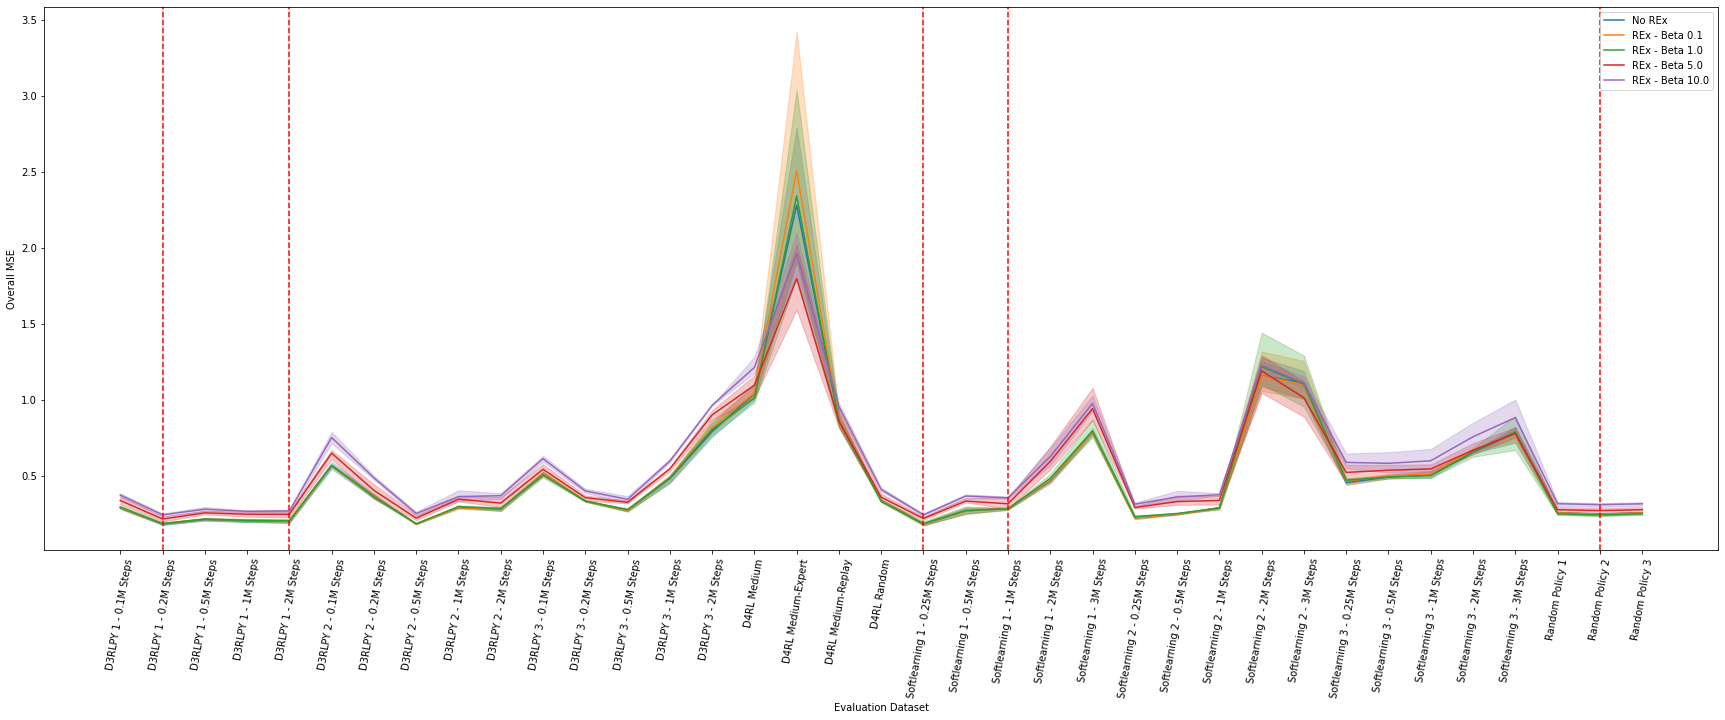

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

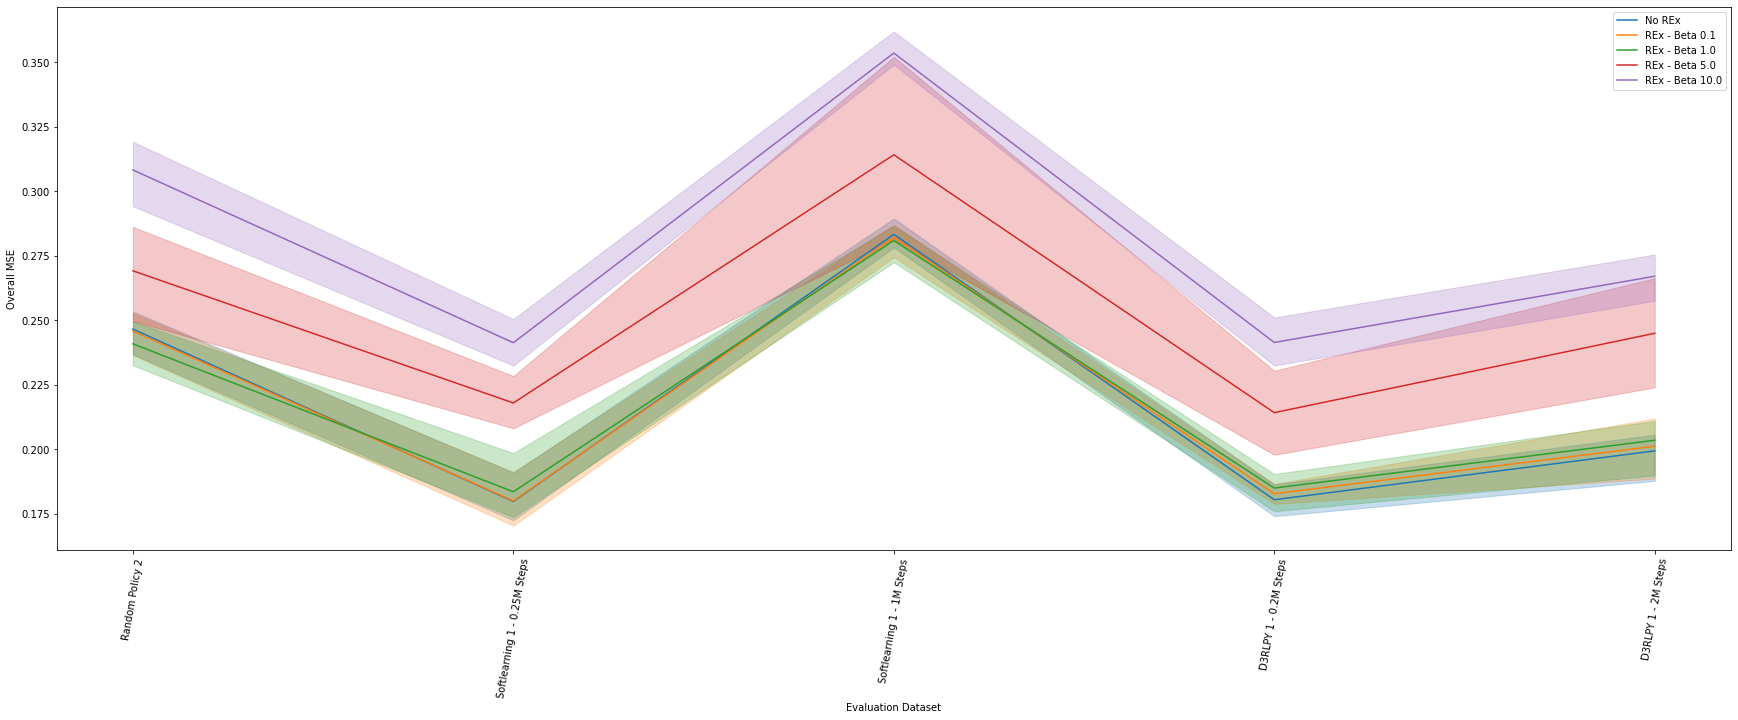

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

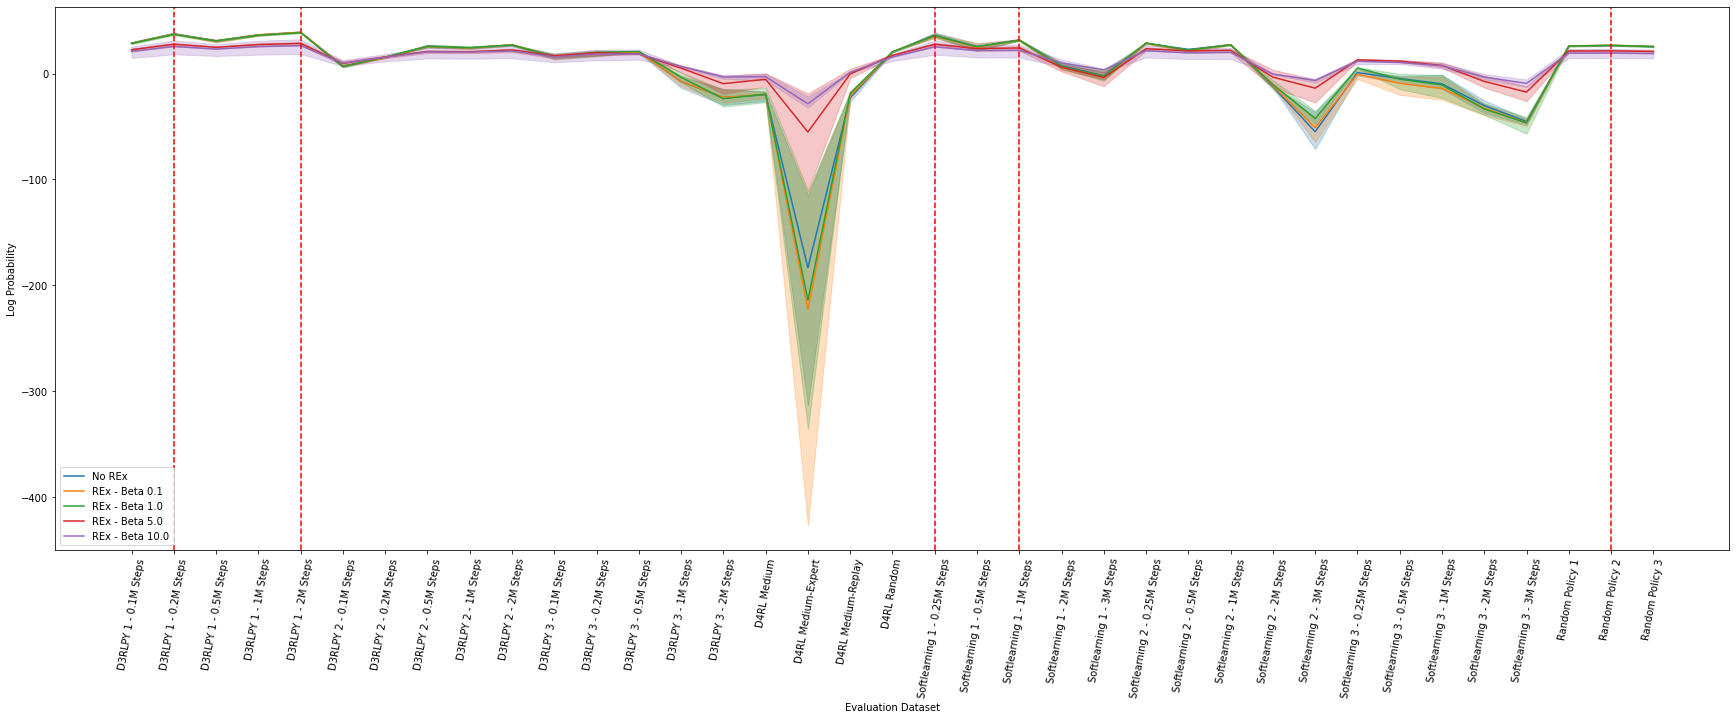

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

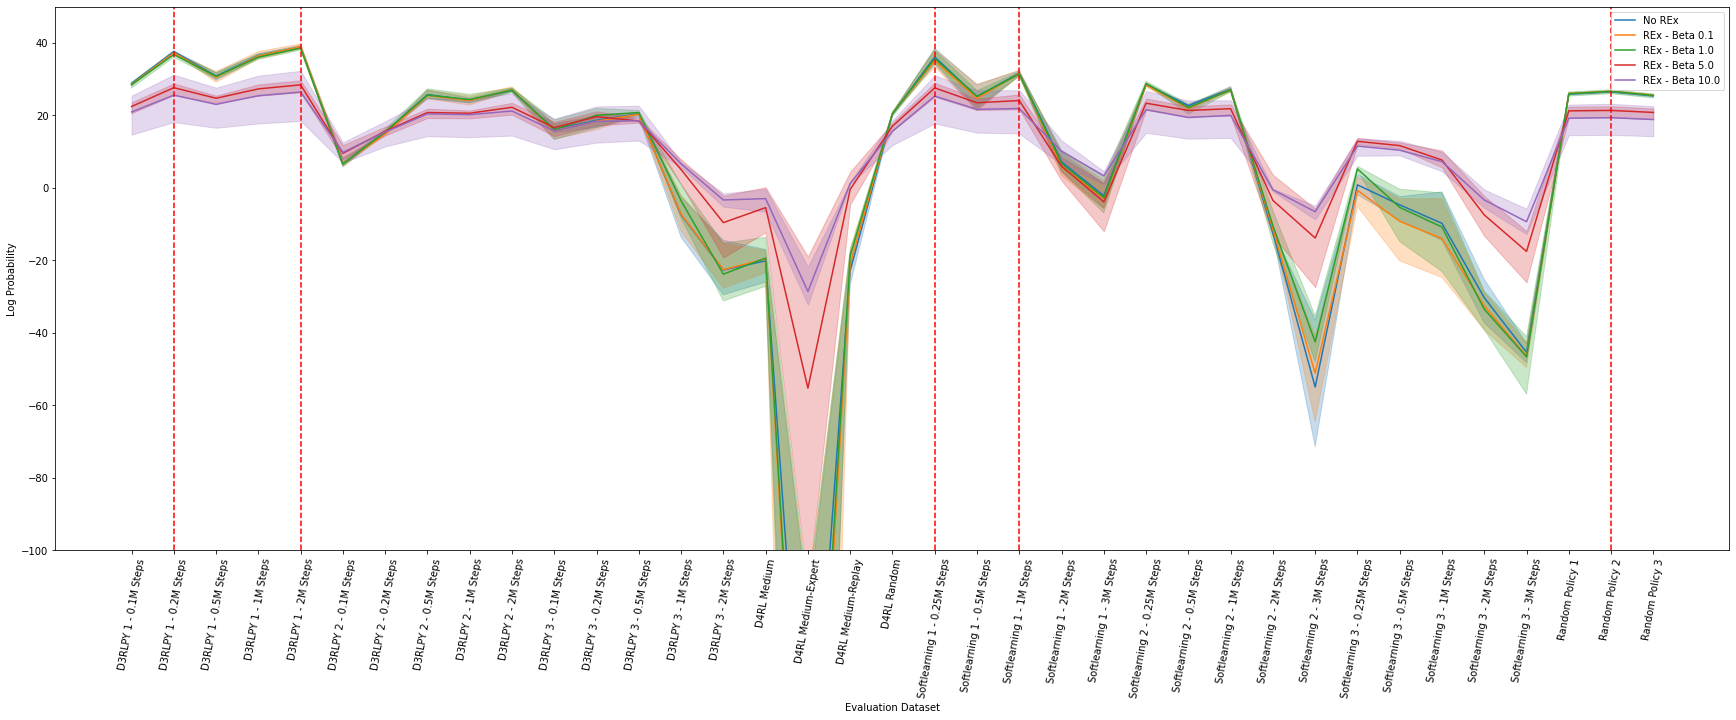

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-100,50)
ax.legend()

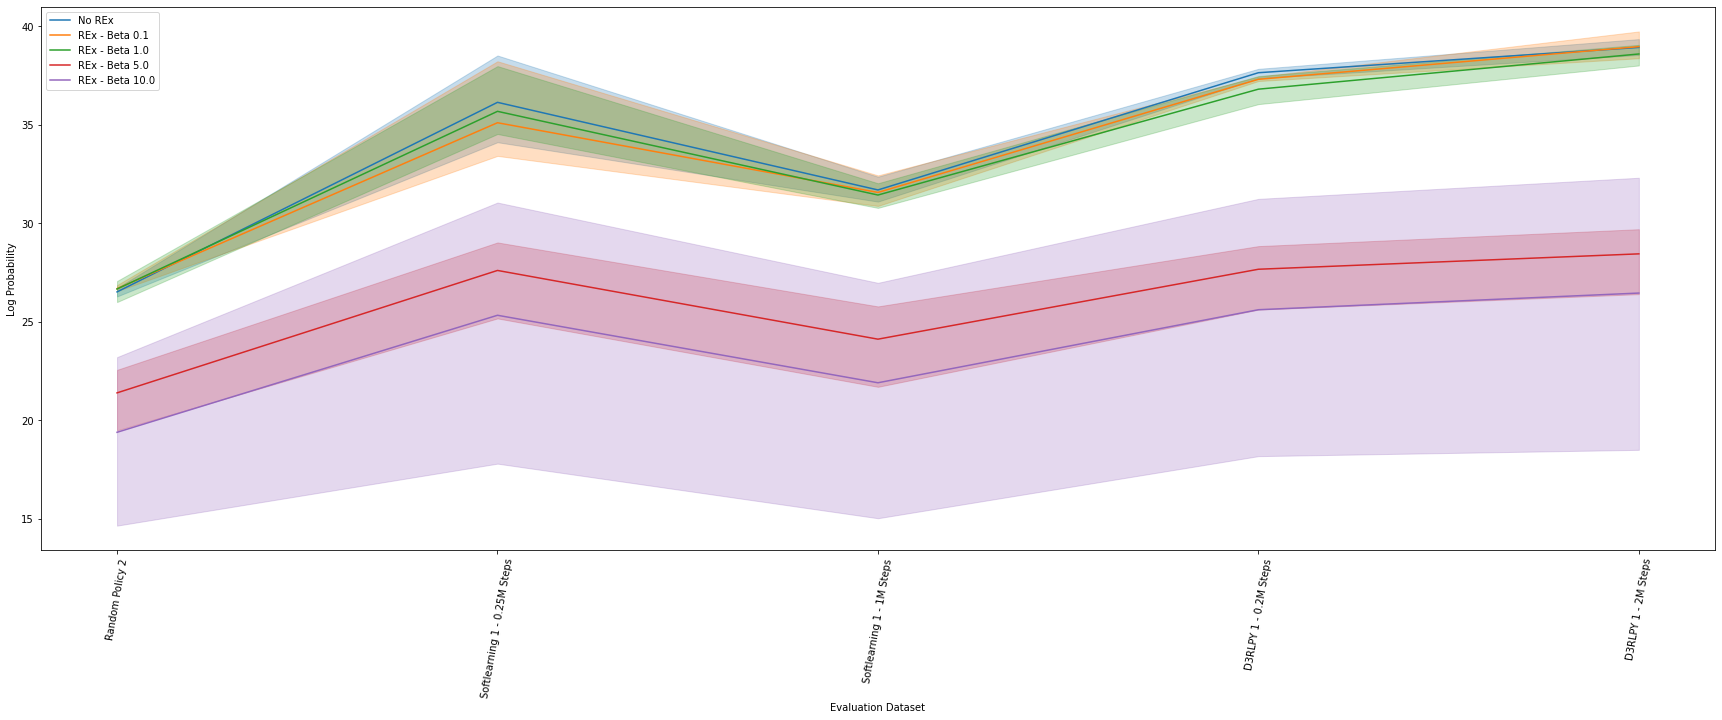

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_01_avgs_df, scores_rex_01_mins_df, scores_rex_01_maxs_df), 
    (scores_rex_1_avgs_df, scores_rex_1_mins_df, scores_rex_1_maxs_df), 
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# Retraining Analysis

In [13]:
retrain_labels = ['No REx - Original Model', 'No REx - 1 Epoch Retraining', 'REx - Beta 10.0 - Original Model', 'REx - Beta 10.0 - 1 Epoch Retraining']

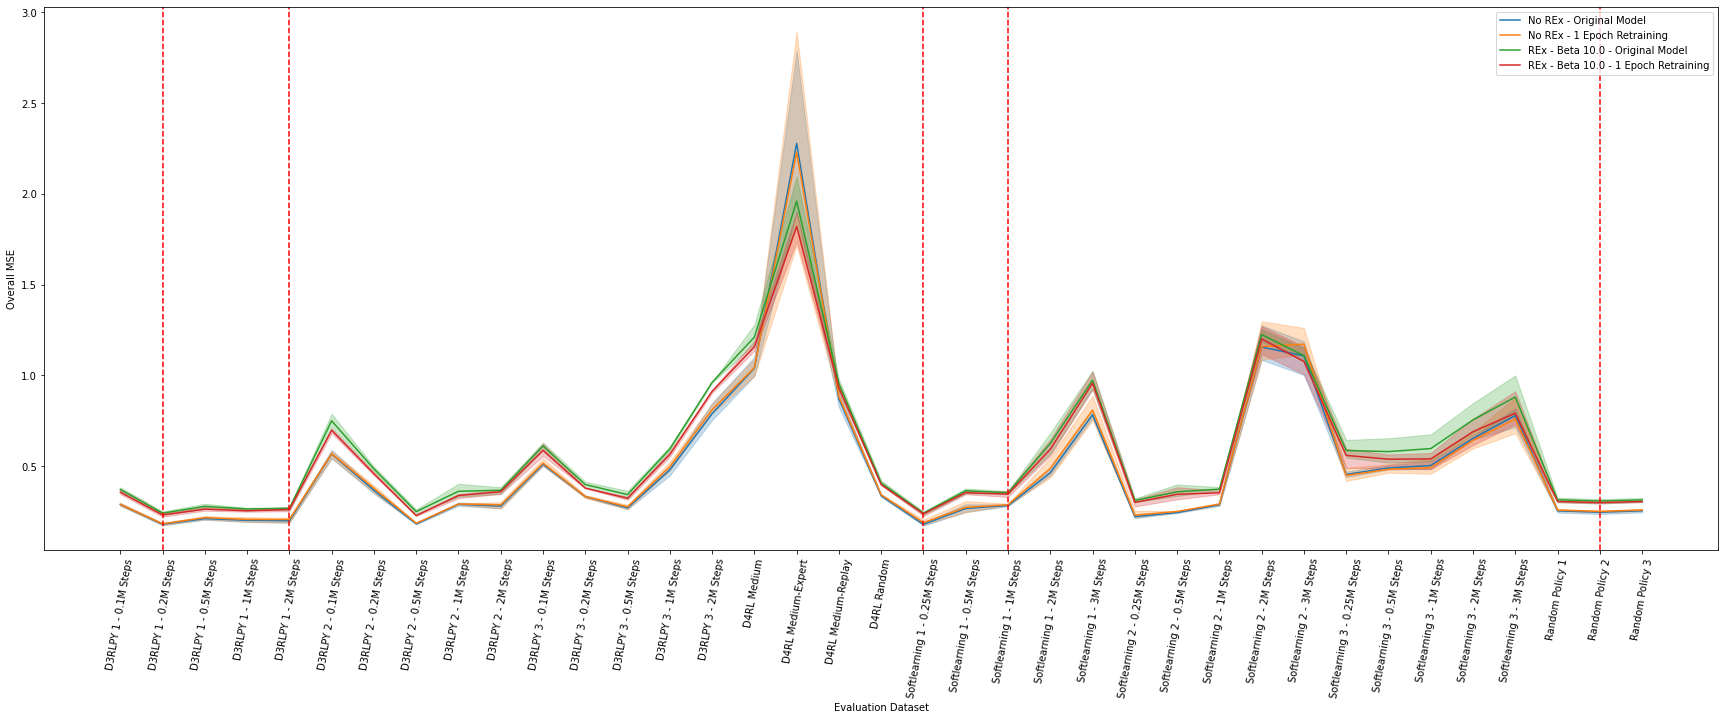

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

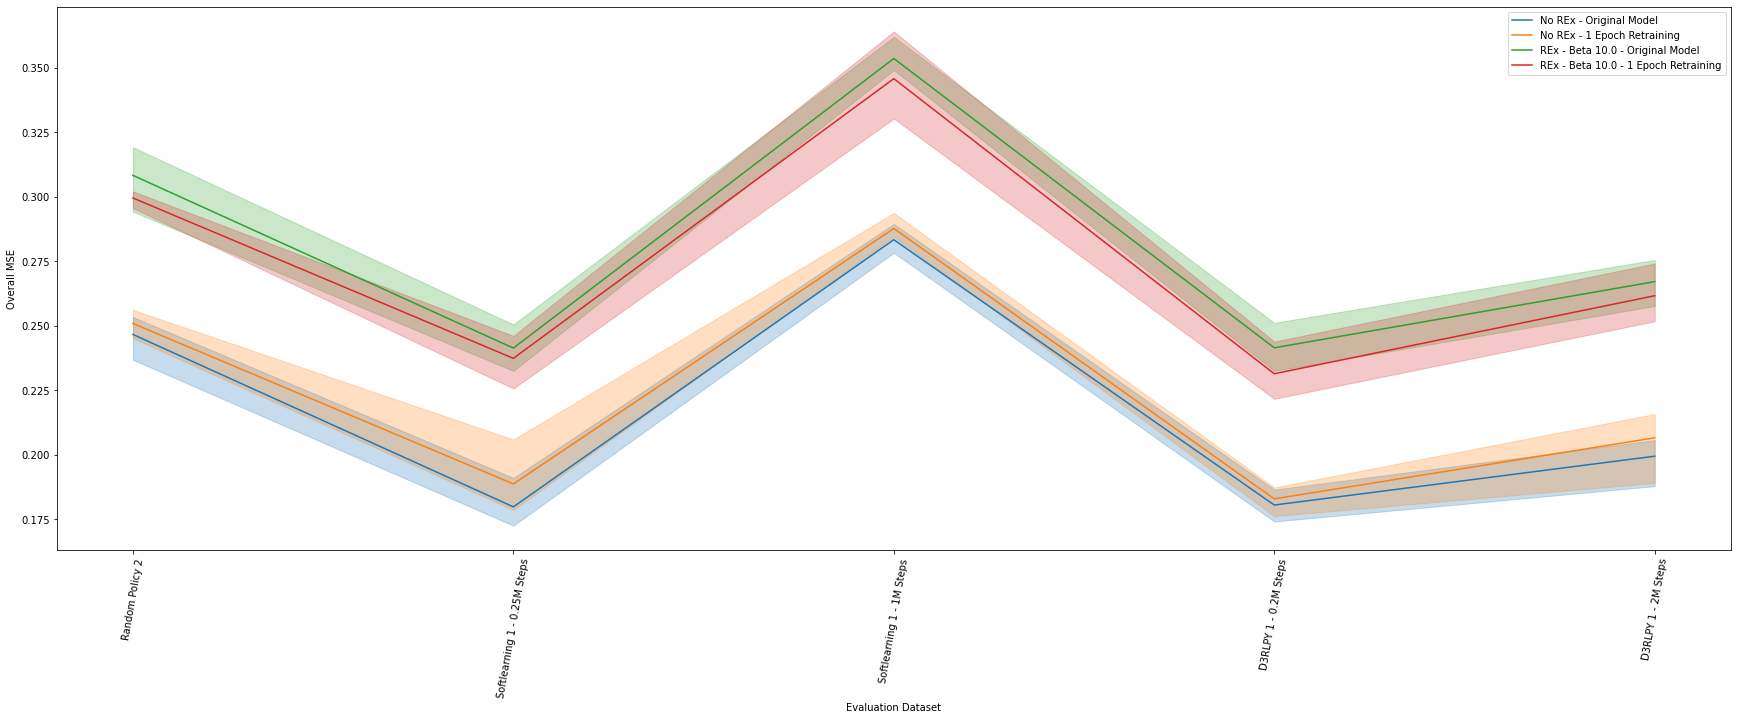

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

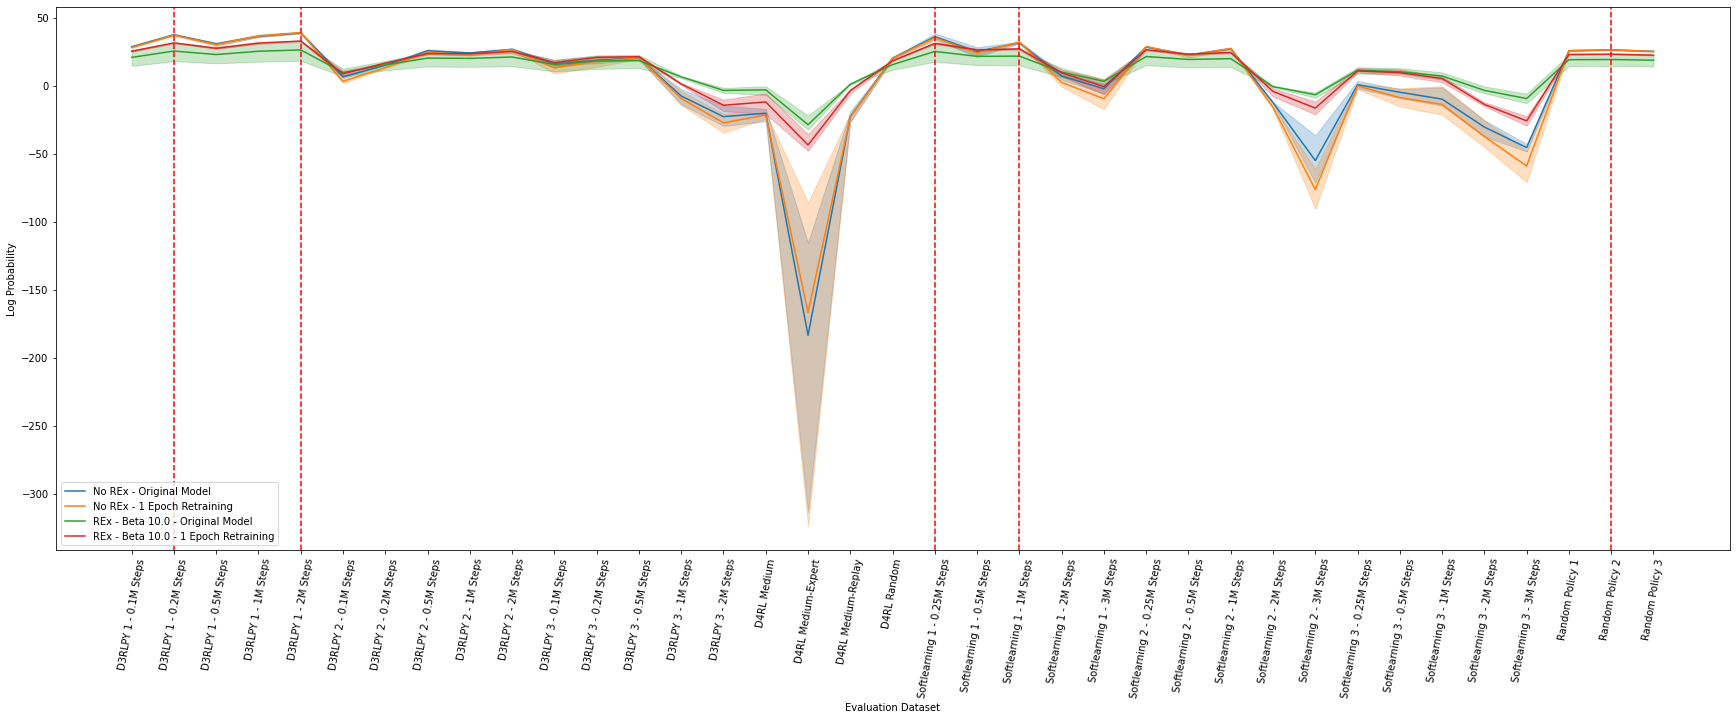

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

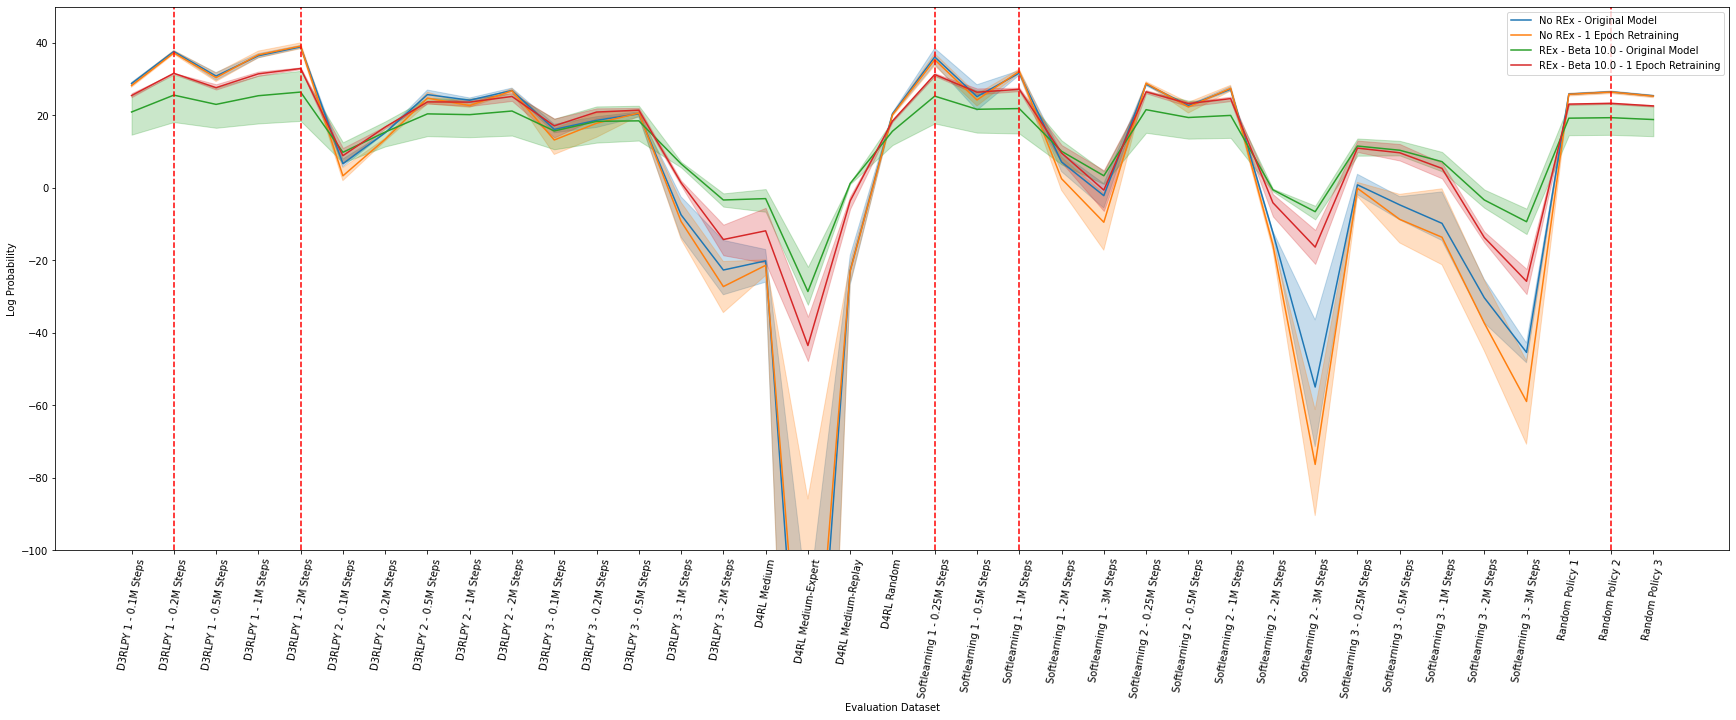

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-100,50)
ax.legend()

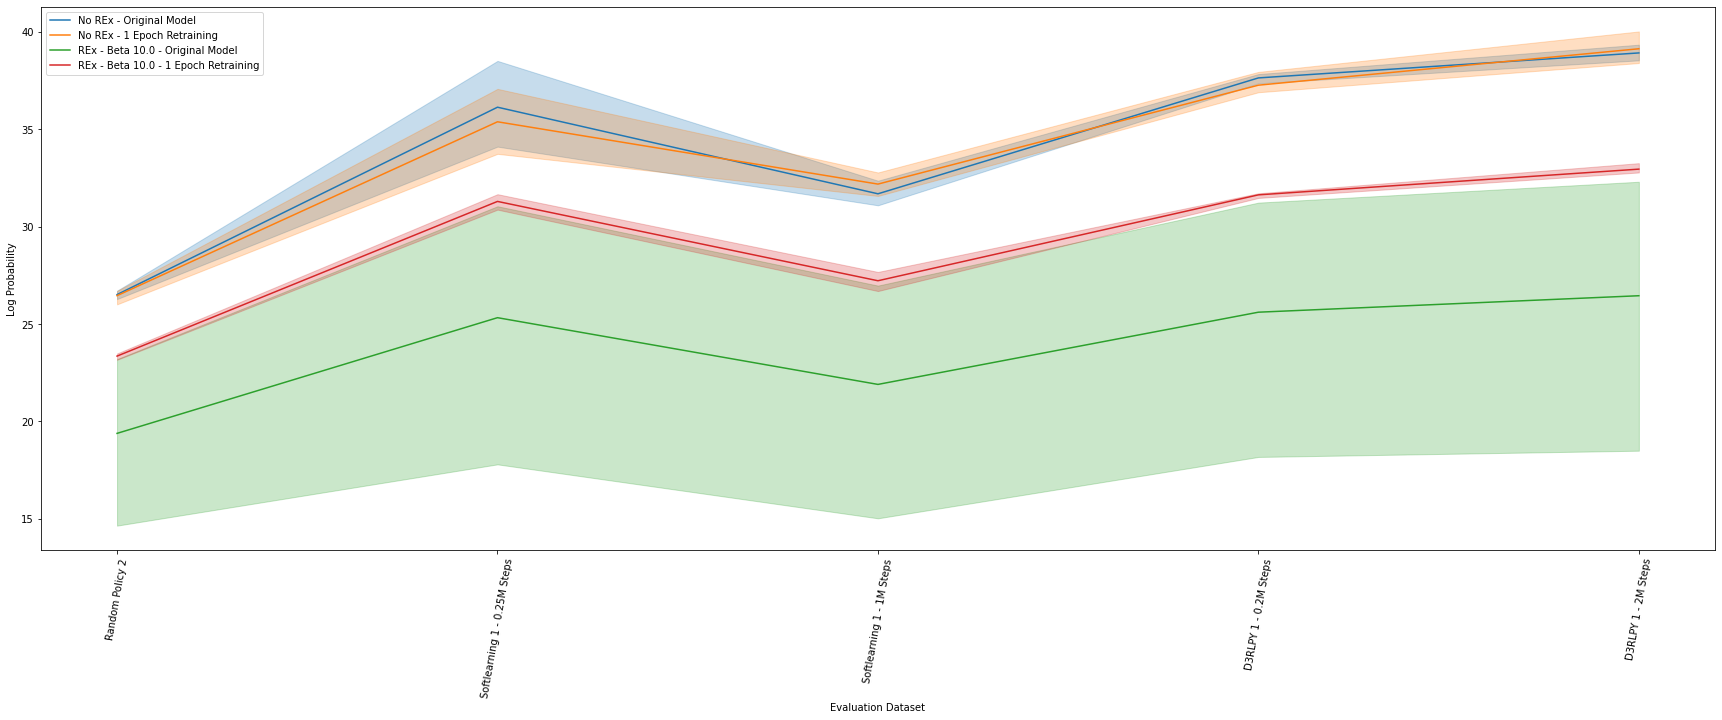

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_no_rex_avgs_df_retrain, scores_no_rex_mins_df_retrain, scores_no_rex_maxs_df_retrain),
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_10_avgs_df_retrain, scores_rex_10_mins_df_retrain, scores_rex_10_maxs_df_retrain), 
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

# Wasserstein Distance

In [19]:
wd_no_rex_arr = experiment_combination_distances(experiments_no_rex, evaluation_datasets)
wd_rex_01_arr = experiment_combination_distances(experiments_rex_01, evaluation_datasets)
wd_rex_1_arr = experiment_combination_distances(experiments_rex_1, evaluation_datasets)
wd_rex_5_arr = experiment_combination_distances(experiments_rex_5, evaluation_datasets)
wd_rex_10_arr = experiment_combination_distances(experiments_rex_10, evaluation_datasets)

wd_no_rex_arr_retrain = experiment_combination_distances(experiments_no_rex_retrain, evaluation_datasets)
wd_rex_10_arr_retrain = experiment_combination_distances(experiments_rex_10_retrain, evaluation_datasets)

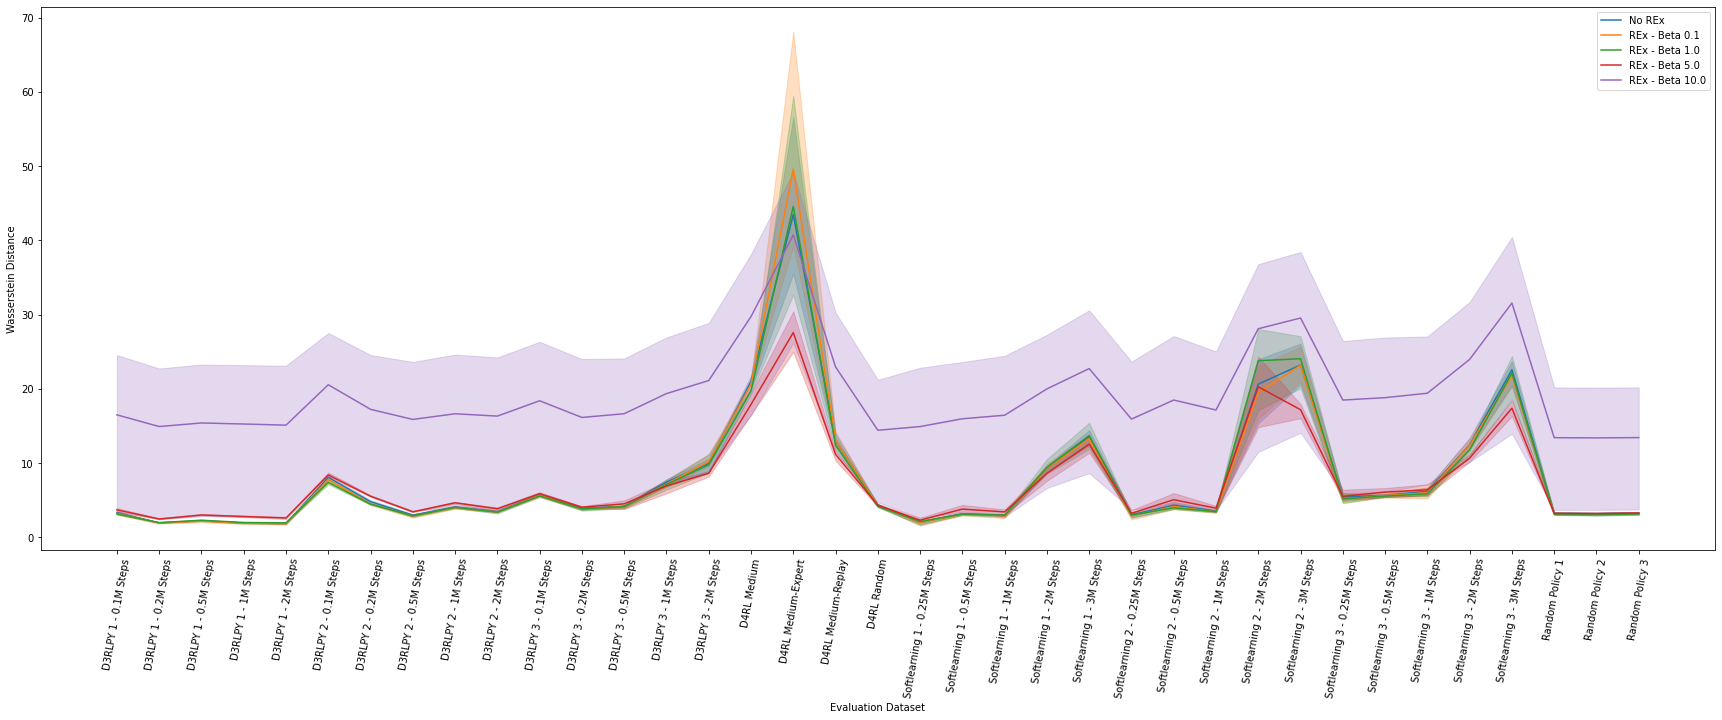

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_rex_01_arr,
    wd_rex_1_arr,
    wd_rex_5_arr,
    wd_rex_10_arr,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()

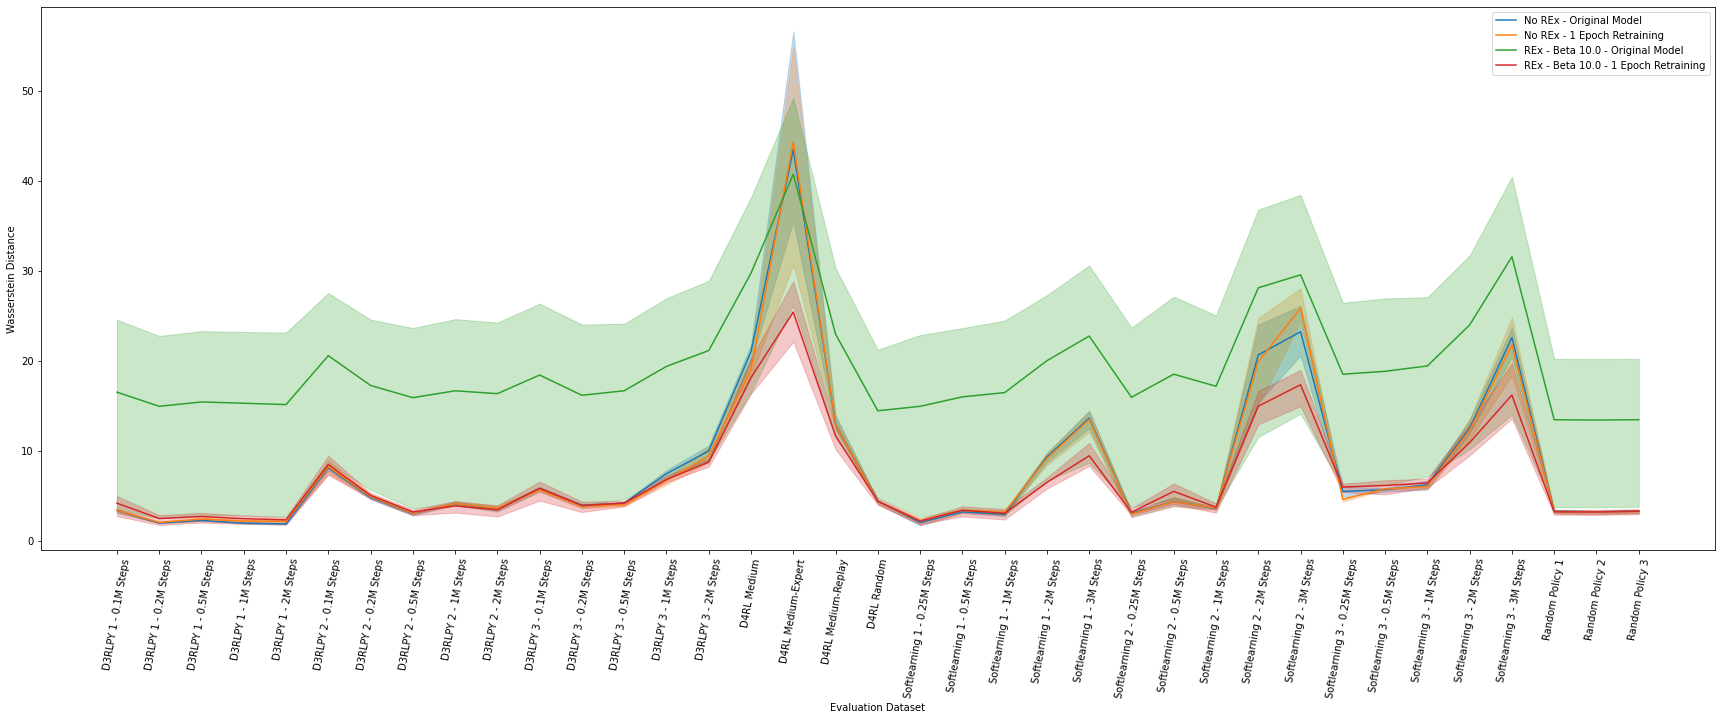

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

for i, wd_arr in enumerate([
    wd_no_rex_arr,
    wd_no_rex_arr_retrain,
    wd_rex_10_arr,
    wd_rex_10_arr_retrain,
]):
    plot_avgs = wd_arr.mean(axis=0)
    plot_mins = wd_arr.min(axis=0)
    plot_maxs = wd_arr.max(axis=0)
    ax.plot(evaluation_datasets, plot_avgs, label=retrain_labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
    ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
    ax.set_xlabel('Evaluation Dataset')
    ax.set_ylabel('Wasserstein Distance')
    ax.legend()